## BOEM Baseline Wake Loss Analysis (still WTK data)

In [1]:
import aep_calculation

C:\Users\pduffy\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
import sys
import numpy as np
import pandas as pd
from time import perf_counter
import matplotlib.pyplot as plt
import math
from math import ceil

In [3]:
from multiprocessing import cpu_count
from multiprocessing import Pool
from my_funs import single_computation
print(cpu_count())

8


### a) Test case: 360MW plant with const. rotor diameter spacing: 7D

In [4]:
# 6, 8, 10, 12, 15, 18, 20 MW machines scaled from the 15MW reference
# 360 MW plants
# using WTK data for the wind resource

In [5]:
# input
lat=40.99776
lon=-124.670844
plant_cap = 360 # start with a 360 MW case to just see if there is a difference in GCF
wt_cap_MW= [6, 8, 10, 12, 15, 18, 20]
latlist = len(wt_cap_MW)*[lat]
lonlist = len(wt_cap_MW)*[lon]
plant_cap_MW= len(wt_cap_MW)*[plant_cap] 
spacing = len(wt_cap_MW)*[7] # 7 rotor diameter spacing
turbpath = 'C:/Users/pduffy/Documents/repos/orca/ORCA/ORCA/library/turbines/scaling_study/scaled_from_15MW/'
pathlist = len(wt_cap_MW)*[turbpath]

In [6]:
# run
# lists for results
CF1_a =[] # capacity factor of 1
aep_a = [] # aep with wakes (net) MWh
aep_wf_a = [] # wake free aep (gross) MWh
wlf_a = [] # wake loss factor    

# multiprocessing call
arguments = [[la, lo, wtcap, pcap, spc, pth] for la, lo, wtcap, pcap, spc, pth in zip(latlist, lonlist, wt_cap_MW, plant_cap_MW, spacing, pathlist)]
nodes = int(cpu_count() * 0.5)
print(f"Using {nodes} nodes")

with Pool(nodes) as pool:
    results = list(pool.starmap(single_computation, arguments))
    

for i in range(len(results)):
    r=results[i]
    CF1_a.append(r[3]) # capacity factor of 1
    aep_a.append(r[0]) # aep with wakes (net) MWh
    aep_wf_a.append(r[1]) # wake free aep (gross) MWh
    wlf_a.append(r[2]) # wake loss factor  

Using 4 nodes


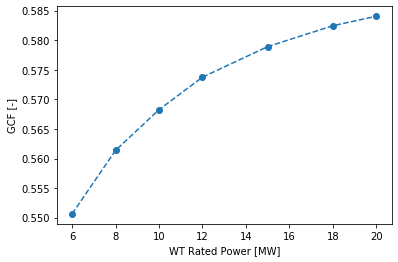

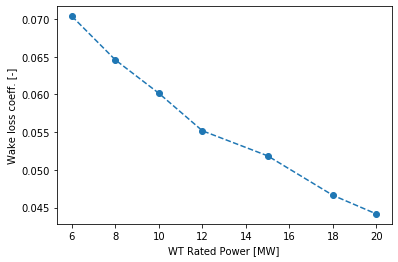

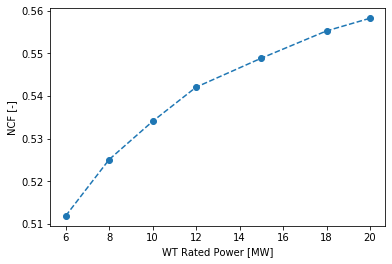

In [7]:
# plot
# GCF
plt.figure()
plt.plot(wt_cap_MW, np.divide(aep_wf_a, CF1_a), marker='o', ls='--')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('GCF [-]')
plt.show()

# Wake loss
plt.figure()
plt.plot(wt_cap_MW, wlf_a, marker='o', ls='--')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('Wake loss coeff. [-]')
plt.show()

# NCF
plt.figure()
plt.plot(wt_cap_MW, np.divide(aep_a, CF1_a), marker='o', ls='--')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('NCF [-]')
plt.show()

### b) Test case: 360MW plant with const. rotor diameter spacing: 7D (const. hub height and no wind shear)

In [8]:
# same as case A, except constant hub height of 150m and no wind shear

In [4]:
# inputs
lat=40.99776
lon=-124.670844
plant_cap = 360 # start with a 360 MW case to just see if there is a difference in GCF
wt_cap_MW= [6, 8, 10, 12, 15, 18, 20]
latlist = len(wt_cap_MW)*[lat]
lonlist = len(wt_cap_MW)*[lon]
plant_cap_MW= len(wt_cap_MW)*[plant_cap] 
spacing = len(wt_cap_MW)*[7] # 7 rotor diameter spacing
turbpath = 'C:/Users/pduffy/Documents/repos/orca/ORCA/ORCA/library/turbines/scaling_study/const_hub_no_shear/'
pathlist = len(wt_cap_MW)*[turbpath]

In [5]:
# run
# lists for results
CF1_b =[] # capacity factor of 1
aep_b = [] # aep with wakes (net) MWh
aep_wf_b = [] # wake free aep (gross) MWh
wlf_b = [] # wake loss factor    

# multiprocessing call
arguments = [[la, lo, wtcap, pcap, spc, pth] for la, lo, wtcap, pcap, spc, pth in zip(latlist, lonlist, wt_cap_MW, plant_cap_MW, spacing, pathlist)]
nodes = int(cpu_count() * 0.5)
print(f"Using {nodes} nodes")

with Pool(nodes) as pool:
    results = list(pool.starmap(single_computation, arguments))
    

for i in range(len(results)):
    r=results[i]
    CF1_b.append(r[3]) # capacity factor of 1
    aep_b.append(r[0]) # aep with wakes (net) MWh
    aep_wf_b.append(r[1]) # wake free aep (gross) MWh
    wlf_b.append(r[2]) # wake loss factor  

Using 4 nodes


In [6]:
print(aep_wf_b, CF1_b)
print(np.divide(aep_wf_b, CF1_b))

[1831415.3040611476, 1831415.303739008, 1831415.3033501098, 1831415.303091375, 1831415.3037735564, 1831415.3037390078, 1831415.3036279008] [3153600, 3153600, 3153600, 3153600, 3153600, 3153600, 3153600]
[0.58073798 0.58073798 0.58073798 0.58073798 0.58073798 0.58073798
 0.58073798]


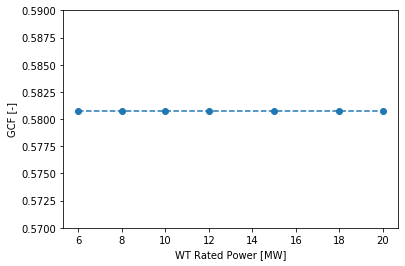

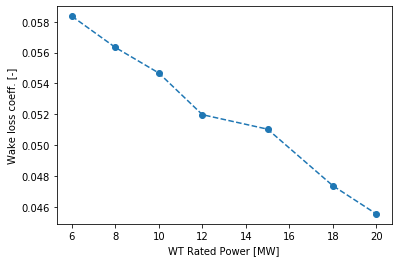

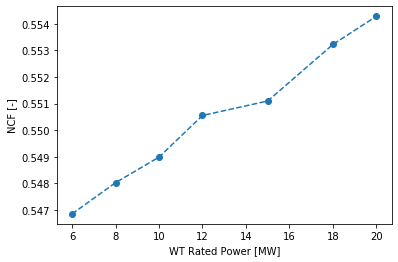

In [9]:
# plot
# GCF
plt.figure()
plt.plot(wt_cap_MW, np.divide(aep_wf_b, CF1_b), marker='o', ls='--')
plt.ylim([0.57,0.59])
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('GCF [-]')
plt.show()

# Wake loss
plt.figure()
plt.plot(wt_cap_MW, wlf_b, marker='o', ls='--')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('Wake loss coeff. [-]')
plt.show()

# NCF
plt.figure()
plt.plot(wt_cap_MW, np.divide(aep_b, CF1_b), marker='o', ls='--')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('NCF [-]')
plt.show()

### c) 1000MW plant with const. rotor diameter spacing: 7D

In [12]:
# same as case A, except 1000MW plant

In [13]:
# input
lat=40.99776
lon=-124.670844
plant_cap = 1000
wt_cap_MW= [6, 8, 10, 12, 15, 18, 20]
latlist = len(wt_cap_MW)*[lat]
lonlist = len(wt_cap_MW)*[lon]
plant_cap_MW= len(wt_cap_MW)*[plant_cap] 
spacing = len(wt_cap_MW)*[7] # 7 rotor diameter spacing
turbpath = 'C:/Users/pduffy/Documents/repos/orca/ORCA/ORCA/library/turbines/scaling_study/scaled_from_15MW/'
pathlist = len(wt_cap_MW)*[turbpath]

In [ ]:
# run
# lists for results
CF1_c =[] # capacity factor of 1
aep_c = [] # aep with wakes (net) MWh
aep_wf_c = [] # wake free aep (gross) MWh
wlf_c = [] # wake loss factor    

# multiprocessing call
arguments = [[la, lo, wtcap, pcap, spc, pth] for la, lo, wtcap, pcap, spc, pth in zip(latlist, lonlist, wt_cap_MW, plant_cap_MW, spacing, pathlist)]
nodes = int(cpu_count() * 0.5)
print(f"Using {nodes} nodes")

with Pool(nodes) as pool:
    results = list(pool.starmap(single_computation, arguments))
    

for i in range(len(results)):
    r=results[i]
    CF1_c.append(r[3]) # capacity factor of 1
    aep_c.append(r[0]) # aep with wakes (net) MWh
    aep_wf_c.append(r[1]) # wake free aep (gross) MWh
    wlf_c.append(r[2]) # wake loss factor  

Using 4 nodes


In [ ]:
# plot
# GCF
plt.figure()
plt.plot(wt_cap_MW, np.divide(aep_wf_c, CF1_c), marker='o', ls='--')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('GCF [-]')
plt.show()

# Wake loss
plt.figure()
plt.plot(wt_cap_MW, wlf_c, marker='o', ls='--')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('Wake loss coeff. [-]')
plt.show()

# NCF
plt.figure()
plt.plot(wt_cap_MW, np.divide(aep_c, CF1_c), marker='o', ls='--')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('NCF [-]')
plt.show()

### d) 1000MW plant with const. absolute spacing: 1 nautical mile

In [ ]:
# same as Case A, except 1000MW plant and 1 nautical mile spacing

In [ ]:
# input
lat=40.99776
lon=-124.670844
plant_cap = 1000
wt_cap_MW= [6, 8, 10, 12, 15, 18, 20]
latlist = len(wt_cap_MW)*[lat]
lonlist = len(wt_cap_MW)*[lon]
plant_cap_MW= len(wt_cap_MW)*[plant_cap] 
nm = 1852.001 # 1 nautical mile in m
wt_D=[ 151.7893277, 175.2712184, 195.9591794, 214.6625258, 240, 262.9068276, 277.1281292]
spacing = np.divide(nm,wt_D) # 1 nautical mile spacing
print(spacing)
turbpath = 'C:/Users/pduffy/Documents/repos/orca/ORCA/ORCA/library/turbines/scaling_study/scaled_from_15MW/'
pathlist = len(wt_cap_MW)*[turbpath]

In [ ]:
# run
CF1_d =[] # capacity factor of 1
aep_d = [] # aep with wakes (net) MWh
aep_wf_d = [] # wake free aep (gross) MWh
wlf_d = [] # wake loss factor

# multiprocessing call
arguments = [[la, lo, wtcap, pcap, spc, pth] for la, lo, wtcap, pcap, spc, pth in zip(latlist, lonlist, wt_cap_MW, plant_cap_MW, spacing, pathlist)]
nodes = int(cpu_count() * 0.5)
print(f"Using {nodes} nodes")

with Pool(nodes) as pool:
    results_b = list(pool.starmap(single_computation, arguments))
    

for i in range(len(results_b)):
    r=results_b[i]
    CF1_d.append(r[3]) # capacity factor of 1
    aep_d.append(r[0]) # aep with wakes (net) MWh
    aep_wf_d.append(r[1]) # wake free aep (gross) MWh
    wlf_d.append(r[2]) # wake loss factor  

In [ ]:
# plot
# GCF
plt.figure()
plt.plot(wt_cap_MW, np.divide(aep_wf_d, CF1_d), marker='o', ls='--')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('GCF [-]')
plt.show()

# Wake loss
plt.figure()
plt.plot(wt_cap_MW, wlf_d, marker='o', ls='--')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('Wake loss coeff. [-]')
plt.show()

# NCF
plt.figure()
plt.plot(wt_cap_MW, np.divide(aep_d, CF1_d), marker='o', ls='--')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('NCF [-]')
plt.show()

In [ ]:
# save some data in MWh (plant cap 2500 MW and 6, 10, 12, 15, 18 MW machines)
#data = {'CF1a': CF1_a,
#        'aepa': aep_a,
#        'aep_wakefree_a':aep_wf_a,
#        'wlf_a': wlf_a,
#        'CF1b': CF1_b,
#        'aepb': aep_b,
#        'aep_wakefree_b':aep_wf_b,
#        'wlf_b': wlf_b}
#ab = pd.DataFrame(data)
#ab
#ab.to_csv('ATB_cases_ab2500.csv')

In [8]:
# GCF comparison between Cases A and B
plt.figure()
plt.plot(wt_cap_MW, np.divide(aep_wf_a, CF1_a), marker='o', ls='--', label= 'Case A')
plt.plot(wt_cap_MW, np.divide(aep_wf_b, CF1_b), marker='o', ls='--', label= 'Case B')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('GCF [-]')
plt.legend()
plt.show()

NameError: name 'aep_wf_a' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:


# Wake loss comparison between all cases
plt.figure()
plt.plot(wt_cap_MW, wlf_a, marker='o', ls='--', label='Case A')
plt.plot(wt_cap_MW, wlf_b, marker='o', ls='--', label='Case B')
plt.plot(wt_cap_MW, wlf_c, marker='o', ls='--', label='Case C')
plt.plot(wt_cap_MW, wlf_d, marker='o', ls='--', label='Case D')
plt.xlabel('WT Rated Power [MW]')
plt.ylabel('Wake loss coeff. [-]')
plt.legend()
plt.show()